<a href="https://www.kaggle.com/code/yaaangzhou/happiness-eda-modelling?scriptVersionId=138624300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-classification-dataset/happydata.csv


# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/happiness-classification-dataset/happydata.csv')
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


# Basic EDA

In [4]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

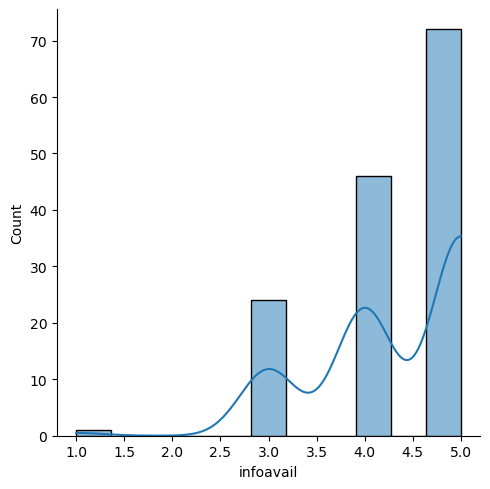

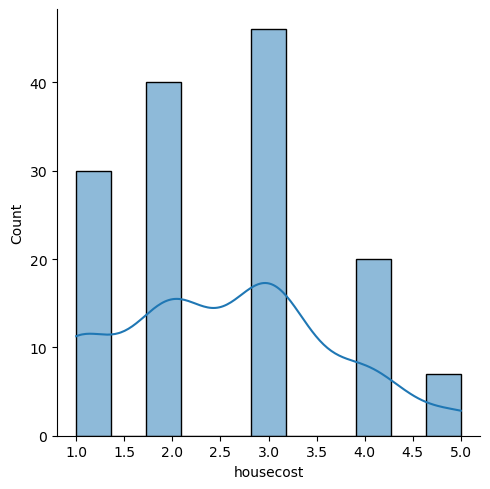

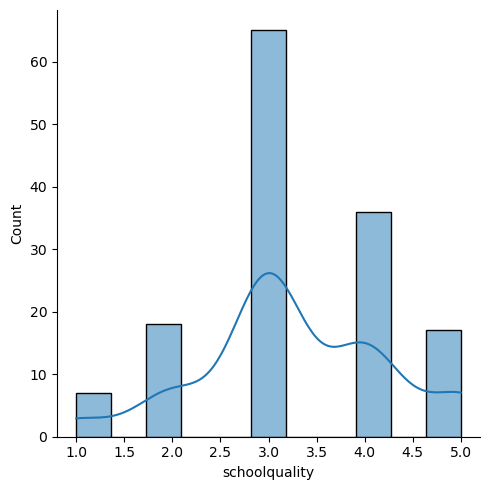

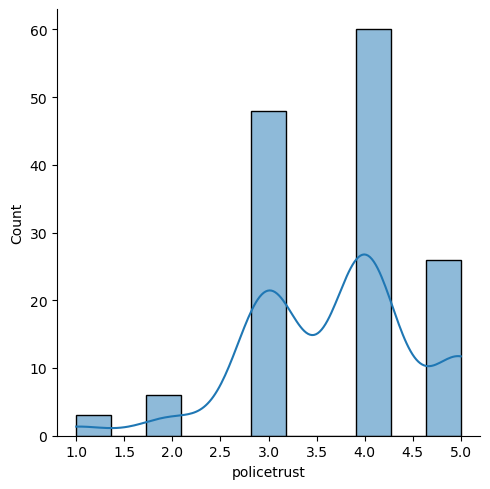

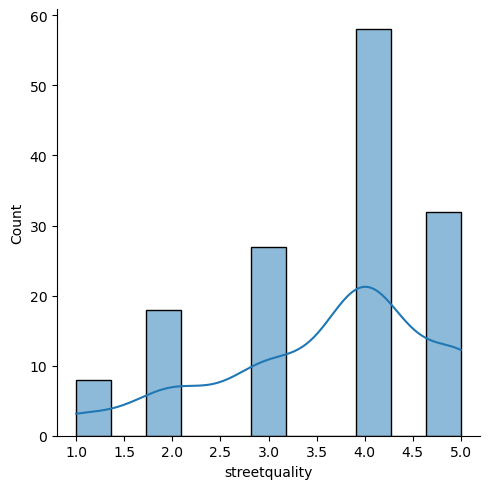

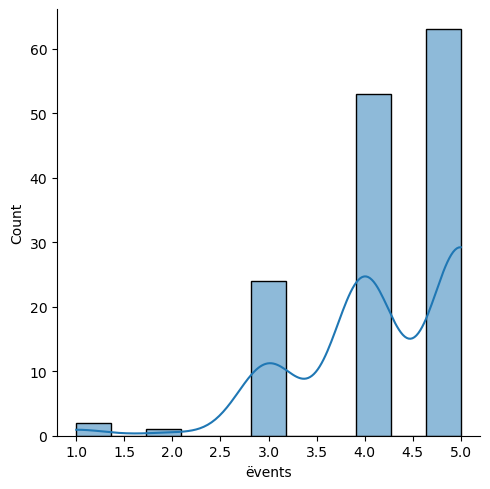

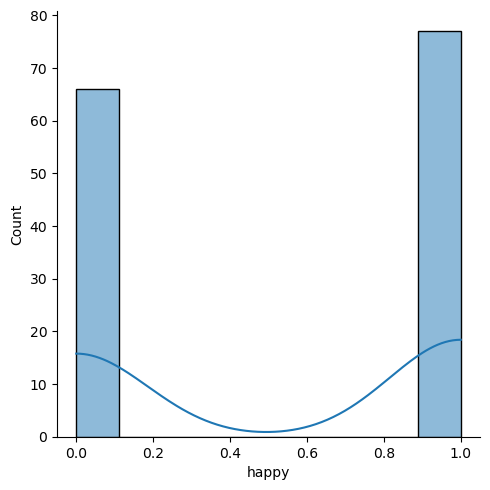

In [6]:
for i in df.columns:
    sns.displot(df[i],kde=True)


The number of positive and negative samples is not consistent and can be adjusted using smote. I am not going to waste time here.

# Choose models

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('happy',axis=1), 
                                                    df['happy'], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [8]:
x_train.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents
84,5,2,3,5,5,5
28,3,3,1,3,3,4
40,5,2,3,3,2,5
86,5,5,5,5,5,5
24,5,1,2,5,2,4


## RF model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100,  300, 500],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 3, 5, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_rf_cv = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
model_rf_cv.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

## XGBoost

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

param_grid = {
    "max_depth": [1, 3, 5, 7],
    "learning_rate": [0.5, 0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1, 3],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.7],
    "colsample_bytree": [0.5],
}

model_xgb_cv = GridSearchCV(model_xgb, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=0)
model_xgb_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1, 3],
                         'learning_rate': [0.5, 0.1, 0.01, 0.05],
                         'max_depth': [1, 3, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.7]},
             scoring='roc_auc')

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

model_lr_cv = GridSearchCV(model_xgb, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=0)
model_lr_cv.fit(x_train, y_train)

[22:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:22] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:23] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:23] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:23] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "fit_intercept", "penalty", "solver" } are not used.

[22:23:23] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']},
             scoring='roc_auc')

# Prediction

In [12]:
for i in [model_rf_cv,model_xgb_cv,model_lr_cv]:
    y_pred = i.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

0.5581395348837209
[[ 7 17]
 [ 2 17]]
0.5813953488372093
[[ 9 15]
 [ 3 16]]
0.5813953488372093
[[13 11]
 [ 7 12]]


ok...no tiene muy buena pinta...

anyway, you can try other models on this dataset, and here we have is just a simple pipeline for a Machine Learning mission.

Hope this can help you.